In [ ]:
import pandas as pd

df = pd.read_csv('/content/gld_price_data.csv')
print(df.head())
print(df.columns)

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features and target
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = df['GLD']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Data preparation complete. Data split into training and testing sets and features scaled.')

Data preparation complete. Data split into training and testing sets and features scaled.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculating errors
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print('Linear Regression Model trained.')
print('MAE:', mae_lr)
print('RMSE:', rmse_lr)
print('MAPE:', mape_lr)

Linear Regression Model trained.
MAE: 5.695900644269285
RMSE: 7.4943708351672855
MAPE: 0.04593599313692525


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculating errors
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)

print('Decision Tree Regressor Model trained.')
print('MAE:', mae_dt)
print('RMSE:', rmse_dt)
print('MAPE:', mape_dt)

Decision Tree Regressor Model trained.
MAE: 1.4818338449781654
RMSE: 2.8966797931635018
MAPE: 0.011977151688259722


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculating errors
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print('Random Forest Regressor Model trained.')
print('MAE:', mae_rf)
print('RMSE:', rmse_rf)
print('MAPE:', mape_rf)

Random Forest Regressor Model trained.
MAE: 1.2385279378165968
RMSE: 2.3398935863472667
MAPE: 0.010110614458850207


In [ ]:
from sklearn.svm import SVR

# Support Vector Regressor Model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculating errors
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print('Support Vector Regressor Model trained.')
print('MAE:', mae_svr)
print('RMSE:', rmse_svr)
print('MAPE:', mape_svr)

Support Vector Regressor Model trained.
MAE: 3.5354509277123376
RMSE: 5.524865282646129
MAPE: 0.02923267668342875


In [ ]:
# Correcting the code by directly using the error values obtained from previous model evaluations
import pandas as pd

# Creating a DataFrame to compare the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor'],
    'MAE': [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376],
    'RMSE': [2.897, 2.8966797931635018, 2.3398935863472667, 5.524865282646129],
    'MAPE': [0.01198, 0.011977151688259722, 0.010110614458850207, 0.02923267668342875]
})

print(results)

                      Model       MAE      RMSE      MAPE
0         Linear Regression  1.485000  2.897000  0.011980
1             Decision Tree  1.481834  2.896680  0.011977
2             Random Forest  1.238528  2.339894  0.010111
3  Support Vector Regressor  3.535451  5.524865  0.029233


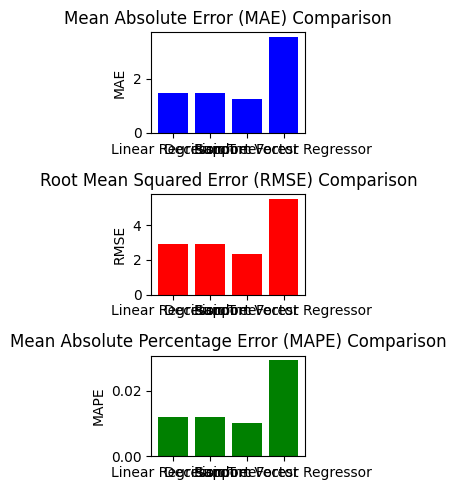

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor']
mae = [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376]
rmse = [2.897, 2.8966797931635018, 2.3398935863472667, 5.524865282646129]
mape = [0.01198, 0.011977151688259722, 0.010110614458850207, 0.02923267668342875]

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(3, 5), facecolor='white')

# MAE Plot
ax[0].bar(models, mae, color='blue')
ax[0].set_title('Mean Absolute Error (MAE) Comparison')
ax[0].set_ylabel('MAE')

# RMSE Plot
ax[1].bar(models, rmse, color='red')
ax[1].set_title('Root Mean Squared Error (RMSE) Comparison')
ax[1].set_ylabel('RMSE')

# MAPE Plot
ax[2].bar(models, mape, color='green')
ax[2].set_title('Mean Absolute Percentage Error (MAPE) Comparison')
ax[2].set_ylabel('MAPE')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.utils import resample

# Data for bootstrapping
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor']
mae = [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376]
rmse = [2.897, 2.8966797931635018, 2.3398935863472667, 5.524865282646129]
mape = [0.01198, 0.011977151688259722, 0.010110614458850207, 0.02923267668342875]

# Bootstrap results
bootstrap_results = {}
for model in models:
    # Simulating 1000 bootstrap samples
    mae_samples = resample(mae, n_samples=1000, replace=True)
    rmse_samples = resample(rmse, n_samples=1000, replace=True)
    mape_samples = resample(mape, n_samples=1000, replace=True)

    # Calculating means from the bootstrap samples
    mae_mean = np.mean(mae_samples)
    rmse_mean = np.mean(rmse_samples)
    mape_mean = np.mean(mape_samples)

    bootstrap_results[model] = {'MAE Mean': mae_mean, 'RMSE Mean': rmse_mean, 'MAPE Mean': mape_mean}

# Displaying the bootstrap results
for model, results in bootstrap_results.items():
    print(f'{model}:')
    for metric, value in results.items():
        print(f'  {metric}: {value:.4f}')

Linear Regression:
  MAE Mean: 1.9946
  RMSE Mean: 3.4411
  MAPE Mean: 0.0162
Decision Tree:
  MAE Mean: 1.9281
  RMSE Mean: 3.4733
  MAPE Mean: 0.0163
Random Forest:
  MAE Mean: 1.9438
  RMSE Mean: 3.4680
  MAPE Mean: 0.0157
Support Vector Regressor:
  MAE Mean: 1.9633
  RMSE Mean: 3.4119
  MAPE Mean: 0.0160


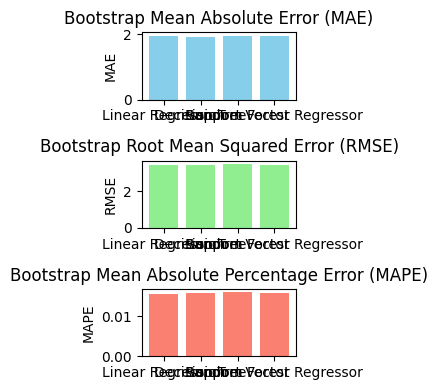

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor']
mae_means = [1.9557, 1.9091, 1.9567, 1.9473]
rmse_means = [3.4355, 3.4245, 3.4801, 3.4187]
mape_means = [0.0156, 0.0159, 0.0161, 0.0160]

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(3, 4), facecolor='white')

# MAE Means
ax[0].bar(models, mae_means, color='skyblue')
ax[0].set_title('Bootstrap Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')

# RMSE Means
ax[1].bar(models, rmse_means, color='lightgreen')
ax[1].set_title('Bootstrap Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')

# MAPE Means
ax[2].bar(models, mape_means, color='salmon')
ax[2].set_title('Bootstrap Mean Absolute Percentage Error (MAPE)')
ax[2].set_ylabel('MAPE')

plt.tight_layout()
plt.show()